## Linear Regression
※ Coursera 강의에서 구체적으로 정리하므로 간단하게 필기하는 것으로 넘어갈 것!

### Mean Absolute Error: 잔차의 절대값의 sum

In [59]:
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_error

In [60]:
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]

median_absolute_error(y_true, y_pred)

0.5

### Root Mean Squared Error

In [61]:
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]

mean_squared_error(y_true, y_pred)

0.375

### Boston Housing example

In [74]:
from sklearn.datasets import load_boston
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [75]:
boston = load_boston()

In [76]:
x_data = boston.data
y_data = boston.target.reshape(boston.target.size, 1)

In [77]:
minmax_scale = preprocessing.MinMaxScaler().fit(x_data)
x_scaled_data = minmax_scale.transform(x_data)

In [78]:
regr = linear_model.LinearRegression(fit_intercept=True,
                                    normalize = False,
                                    copy_X = True,
                                    n_jobs=8)
regr.fit(x_scaled_data, y_data)
regr

LinearRegression(n_jobs=8)

In [79]:
regr.coef_, regr.intercept_

(array([[ -9.60975755,   4.64204584,   0.56083933,   2.68673382,
          -8.63457306,  19.88368651,   0.06721501, -16.22666104,
           7.03913802,  -6.46332721,  -8.95582398,   3.69282735,
         -19.01724361]]),
 array([26.62026758]))

In [80]:
regr.predict(x_data[:10])

array([[ -496.63540908],
       [ -338.94469457],
       [ -242.80148556],
       [ -112.39295726],
       [ -146.28666192],
       [ -167.8480859 ],
       [ -769.05385608],
       [ -893.75386766],
       [-1149.95632991],
       [ -907.08045989]])

In [81]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled_data, 
                                                    y_data, 
                                                    test_size=0.3) 

In [82]:
regr.predict(X_test[:10])

array([[19.45123791],
       [22.86952447],
       [21.29805174],
       [24.85686978],
       [22.97657219],
       [14.28275814],
       [19.7720367 ],
       [13.04234787],
       [20.46870847],
       [22.71820008]])

In [83]:
y_true = y_test
y_pred = regr.predict(X_test)
np.sqrt(((y_true - y_pred) ** 2).sum()/len(y_true))
mean_squared_error(y_true, y_pred)

24.341693338198155

## Stochastic Gradient Descent
- Full-batch gradient descent?  
안정적 cost function but 메모리 문제, 대규모 dataset = 느린 업데이트
- dataset에서 random하게 training sample 뽑은 후 학습 → data 넣기 전 shuffle
- 업데이트 속도 개선 but cost가 더 이상 줄어들지 않을 때 어려움

### Mini batch SGD
- 한 번의 일정량의 데이터를 랜덤하게 뽐아서 학습
- SGD + Batch SGD
- 가장 일반적으로 많이 쓰이는 기법

### Epoch & Batch-size
- epoch: 전체 데이터가 training에 들어가는 횟수
- Full-batch n번 실행 = n epoch
- Batch-size: 한번에 학습되는 데이터의 갯수 
- n(batch) = len(data) / Batch-size

## SGD Implementation issue
※ PPT 참고할 것
- iteration issue, learning-rate decay

## Overfitting and Regulation

### Overfitting
- 학습데이터 과다 최적화 → 해로운 데이터의 예측 ↓
- Bias - Variance:  
▶ High bias: 잘못된 데이터만 계속 학습 → 잘못된 weight만 update  
▶ High variance: Error을 고려하지 않음 → 모든 weight가 update  

## Linear Regression with SGD

In [84]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [87]:
X = df.values
y = boston.target

In [98]:
from sklearn.linear_model import SGDRegressor #eta0 = learning-rate
lr_SGD = SGDRegressor(max_iter =10000, eta0=0.00001, learning_rate="constant")

In [99]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
std_scaler.fit(X)
X_scaled = std_scaler.transform(X)

In [100]:
lr_SGD.fit(X_train, y_train)

SGDRegressor(eta0=1e-05, learning_rate='constant', max_iter=10000)

In [101]:
y_hat = lr_SGD.predict(X_test)
y_true = y_test

In [102]:
import sklearn
mse = sklearn.metrics.mean_squared_error(y_hat, y_true)
rmse = np.sqrt((((y_hat - y_true)**2).sum() / len(y_true)))
rmse, mse

(4.774825955724645, 22.79896290746177)

Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

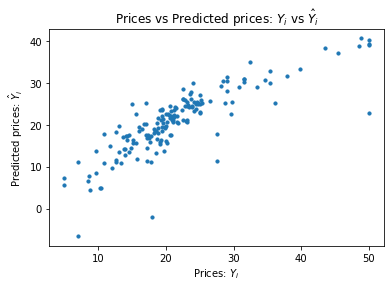

In [103]:
plt.scatter(y_true, y_hat, s=10)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")